In [1]:
import sys
sys.path.append('../')
from numpy import *
from PyGMO import *
import matplotlib.pyplot as plt
from Optimisation import HSS
from Trajectory import Point_Lander_Drag

In [2]:
model = Point_Lander_Drag()
prob  = HSS(model, nsegs=20)

In [3]:
zguess = load('../Data/HSS_20_Drag_Base.npy')
pop = population(prob)
pop.push_back(zguess)

In [4]:
algo1 = algorithm.scipy_slsqp(max_iter=5000, screen_output=True)
algo2 = algorithm.mbh(algo1, stop=1)

In [5]:
pop = algo2.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   290    -9.148584E+03     1.000000E+00
    2   580    -9.149180E+03     1.000000E+00
    3   870    -9.150754E+03     1.000000E+00
    4  1160    -9.153243E+03     1.000000E+00
    5  1450    -9.153747E+03     1.000000E+00
    6  1740    -9.153844E+03     1.000000E+00
    7  2030    -9.153782E+03     1.000000E+00
    8  2320    -9.153621E+03     1.000000E+00
    9  2610    -9.153437E+03     1.000000E+00
   10  2900    -9.153259E+03     1.000000E+00
   11  3190    -9.152024E+03     1.000000E+00
   12  3480    -9.151264E+03     1.000000E+00
   13  3770    -9.150405E+03     1.000000E+00
   14  4060    -9.149161E+03     1.000000E+00
   15  4350    -9.148372E+03     1.000000E+00
   16  4640    -9.147611E+03     1.000000E+00
   17  4930    -9.144515E+03     1.000000E+00
   18  5220    -9.138874E+03     1.000000E+00
   19  5510    -9.124170E+03     1.000000E+00
   20  5800    -9.105293E+03     1.000000E+00
   21  6090    -9.077250E+03     1

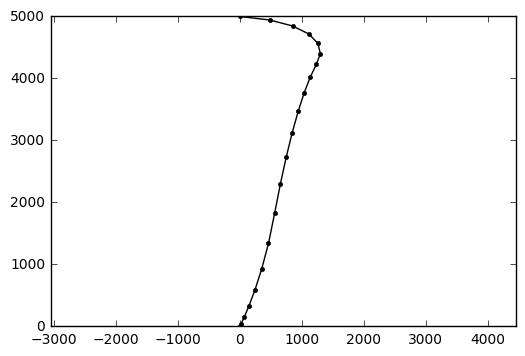

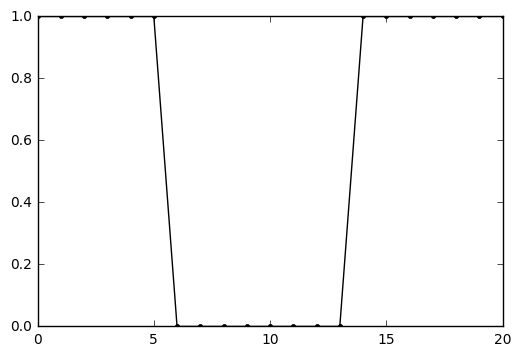

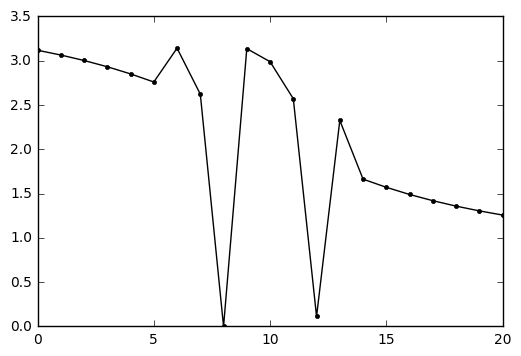

In [6]:
tf, sb, cb, s, c = prob.Decode(pop.champion.x)
plt.plot(s[:,0], s[:,1], 'k.-')
plt.axes().set_aspect('equal', 'datalim')
plt.show()
plt.plot(c[:,0], 'k.-')
plt.show()
plt.plot(c[:,1], 'k.-')
plt.show()

In [9]:
# AWESOME! Save it before its lost!
z = pop.champion.x
save("../Data/HSS_20_Mars_Base", z)

In [8]:
print load("../Data/HSS_20_Mars.npy") # Good, it worked!

[   75.57121355     0.          5000.           150.           -10.          8165.
     1.             3.11847497   255.74527016  4976.47975218   134.27893053
   -16.07157138  8113.54529188     1.             3.09212745   483.25346698
  4942.4234465    118.61352293   -21.71119026  8062.09058377     1.
     3.06435849   682.62212949  4898.62256727   103.00041959   -26.89398136
  8010.63587565     1.             3.03437844   853.94554451  4845.93350567
    87.4402669    -31.5907103   7959.18116754     1.             3.00265528
   997.32007194  4785.24878632    71.93631659   -35.77021849  7907.72645942
     1.             2.96842782  1112.85679518  4717.54162334    56.49759122
   -39.39639764  7856.27175131     1.             2.93208123  1200.67927608
  4643.82934407    41.13663998   -42.4317185   7804.81704319     1.
     2.89299442  1260.95178306  4565.22566903    25.87484878   -44.83335209
  7753.36233508     1.             2.85139579  1293.86639628  4482.89573712
    10.73851394   -46